# Analysis of Electronic Sales

#### --------------------
- Author = Aditya Kumar
- Libraries Used :- numpy,pandas,plotly,mapbox,json,matplotlib,seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re

In [2]:
# changing Directory
os.chdir(r'./Data/')

In [3]:
# df = pd.read_csv('Sales_April_2019.csv')
# for filee in os.listdir():  
#     ndf = pd.read_csv(filee)
#     df = pd.concat([df,ndf])
# df.to_csv("all_data.csv",index=False)

In [4]:
df = pd.read_csv("all_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615699 entries, 0 to 615698
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          613887 non-null  object
 1   Product           613887 non-null  object
 2   Quantity Ordered  613887 non-null  object
 3   Price Each        613887 non-null  object
 4   Order Date        613887 non-null  object
 5   Purchase Address  613887 non-null  object
dtypes: object(6)
memory usage: 28.2+ MB


In [6]:
df.isna().sum()

Order ID            1812
Product             1812
Quantity Ordered    1812
Price Each          1812
Order Date          1812
Purchase Address    1812
dtype: int64

## Task1 Clean the Data

In [7]:
# Seeing the Null values
na_df = df[df.isna().any(axis=1)]
na_df.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# All Null values
all_na = na_df.isna().any(axis=1).sum()

In [9]:
# Any Null values
any_na = na_df.isna().all().sum()

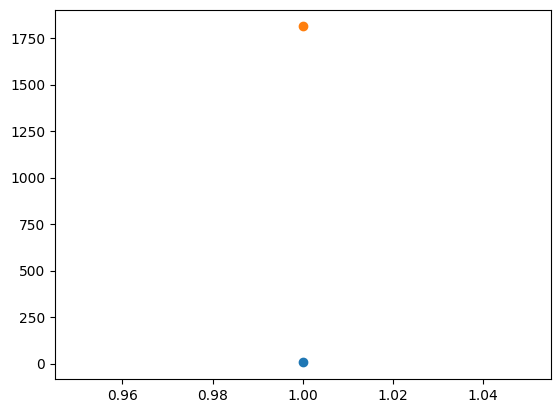

In [10]:
# Ploting the Total Null Values
plt.scatter(y=any_na,x = [1])
plt.scatter(y=all_na,x = [1])


In [11]:
# dropping the Null Values
df.dropna(how='all',inplace=True)
df.reset_index(drop=True,inplace=True)
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [12]:
# Drop all The Duplicate Rows
df.drop_duplicates(inplace =True)
df.reset_index()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
185682,241272,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185683,241273,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185684,241274,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185685,241275,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Dropping the Headings

In [13]:
import re

In [14]:
def convert_Order(x):
    return bool(re.match(r'[a-zA-Z\s]+$', x)) 

In [15]:
# condition on basis we are dropping
i = df['Order ID'].apply(convert_Order)
i[517:]

518       False
519       False
520       False
521       False
522       False
          ...  
241272    False
241273    False
241274    False
241275    False
241276    False
Name: Order ID, Length: 185170, dtype: bool

In [16]:
# dropping the Title Values
df.drop(index = df[i].index,inplace=True)
df.reset_index(drop = True,inplace=True)
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Task 2 Adding Month Column

In [17]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


## Task 3 chnaging data types

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Quantity Ordered  185686 non-null  object
 3   Price Each        185686 non-null  object
 4   Order Date        185686 non-null  object
 5   Purchase Address  185686 non-null  object
 6   Month             185686 non-null  object
dtypes: object(7)
memory usage: 9.9+ MB


In [19]:
# Converting dtype
df['Order Date'] =  pd.to_datetime(df['Order Date'])
df['Order ID'] = pd.to_numeric(df['Order ID'],downcast ='integer')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int16')
df['Price Each'] = df['Price Each'].astype('float32')
df['Month'] = df['Month'].astype(np.int16)

C:\Users\gamin\AppData\Local\Temp\ipykernel_15376\1495062626.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] =  pd.to_datetime(df['Order Date'])


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int32         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int16         
 3   Price Each        185686 non-null  float32       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Month             185686 non-null  int16         
dtypes: datetime64[ns](1), float32(1), int16(2), int32(1), object(2)
memory usage: 6.4+ MB


## Task 4 Add a Sales Column

In [21]:
sales = pd.Series(df['Price Each']*df['Quantity Ordered'],dtype='float64',
                  name = 'Sales')
sales = pd.DataFrame(sales)
sales

,Sales
0,23.900000
1,99.989998
2,600.000000
3,11.990000
4,11.990000
...,...
185681,8.970000
185682,700.000000
185683,700.000000
185684,379.989990


In [22]:
df = pd.concat([df,sales],axis=1)
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000
1,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998


#### Reorder the Dataset

In [23]:
df = df.iloc[:,[0,4,1,2,3,7,6,5]]
df.head(2)

,Order ID,Order Date,Product,Quantity Ordered,Price Each,Sales,Month,Purchase Address
0,176558,2019-04-19 08:46:00,USB-C Charging Cable,2,11.950000,23.900000,4,"917 1st St, Dallas, TX 75001"
1,176559,2019-04-07 22:30:00,Bose SoundSport Headphones,1,99.989998,99.989998,4,"682 Chestnut St, Boston, MA 02215"


### Q1 which month has most sales and how much??

In [24]:
df_temp = df[['Month','Quantity Ordered','Price Each','Sales']].groupby(by=['Month']).sum()
df_temp

,Quantity Ordered,Price Each,Sales
Month,,,
1,10893,1810924.750,1.821413e+06
2,13431,2186940.250,2.200078e+06
3,16979,2789084.750,2.804973e+06
4,20536,3366218.750,3.389218e+06
5,18653,3133134.500,3.150616e+06
6,15234,2560503.500,2.576280e+06
7,16054,2631225.000,2.646461e+06
8,13429,2226964.000,2.241083e+06
9,13091,2081897.625,2.094466e+06


Text(0, 0.5, 'Sales un USD $')

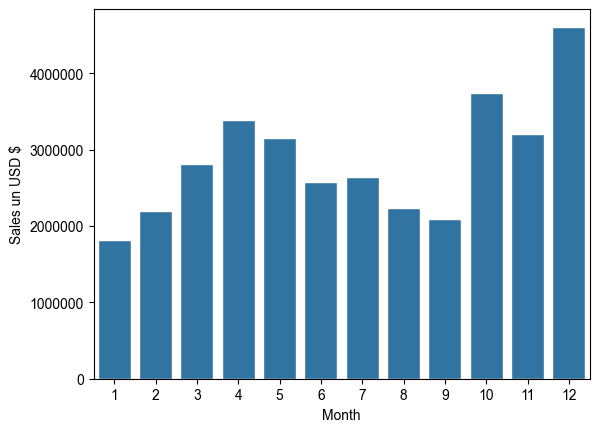

In [25]:
# plotting the above

# Set the scientific Notation oFf
plt.ticklabel_format(style='plain', axis='both')

sns.set_theme(context = 'notebook',style = 'darkgrid')
sns.barplot(data= df_temp,x = 'Month',y='Sales')
plt.ylabel('Sales un USD $')

In [26]:
# delete the temp 
del df_temp

### Q2 Which City has mos no of sales

In [27]:
df['City'] = df['Purchase Address'].apply(lambda x : x.split(',')[1])
df.head(3)

,Order ID,Order Date,Product,Quantity Ordered,Price Each,Sales,Month,Purchase Address,City
0,176558,2019-04-19 08:46:00,USB-C Charging Cable,2,11.950000,23.900000,4,"917 1st St, Dallas, TX 75001",Dallas
1,176559,2019-04-07 22:30:00,Bose SoundSport Headphones,1,99.989998,99.989998,4,"682 Chestnut St, Boston, MA 02215",Boston
2,176560,2019-04-12 14:38:00,Google Phone,1,600.000000,600.000000,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles


In [28]:
df_temp =df[['Month','City','Quantity Ordered','Price Each','Sales']].groupby(by=['City']).sum()

<BarContainer object of 9 artists>

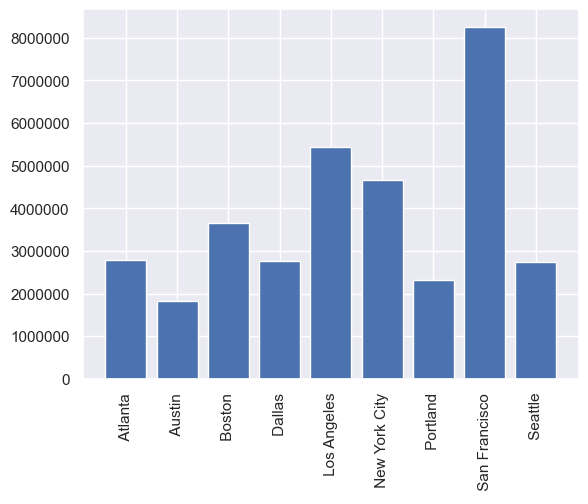

In [29]:
# plotting

# Set the scientific Notation oFf
plt.ticklabel_format(style='plain', axis='both')

plt.xticks(rotation = 'vertical')
plt.bar(x = df_temp.index, height = df_temp['Sales'])

In [30]:
del df_temp

### Q3 What time must we display the ad to maximise the sales??

In [31]:
df['Hour'] = df['Order Date'].dt.hour 
df.head(2)

,Order ID,Order Date,Product,Quantity Ordered,Price Each,Sales,Month,Purchase Address,City,Hour
0,176558,2019-04-19 08:46:00,USB-C Charging Cable,2,11.950000,23.900000,4,"917 1st St, Dallas, TX 75001",Dallas,8
1,176559,2019-04-07 22:30:00,Bose SoundSport Headphones,1,99.989998,99.989998,4,"682 Chestnut St, Boston, MA 02215",Boston,22


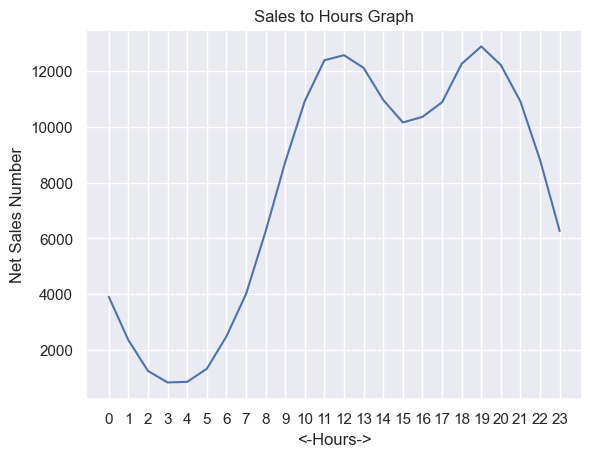

In [32]:
# Plotting
ls_index = df[['Hour','Sales']].groupby('Hour').count().index
sales = df[['Hour','Sales']].groupby('Hour').count()['Sales']

# plotting the sales
plt.xlabel('<-Hours->')
plt.ylabel('Net Sales Number')
plt.title('Sales to Hours Graph')
plt.xticks(ls_index)
plt.grid(visible =True,which = 'both')
plt.plot(ls_index,sales)

## Q4 Which Items were sold Toghether

In [33]:
# Get Duplcates
d2 =df.copy()
df = df[df['Order ID'].duplicated(keep = False)]
df.head()

,Order ID,Order Date,Product,Quantity Ordered,Price Each,Sales,Month,Purchase Address,City,Hour
2,176560,2019-04-12 14:38:00,Google Phone,1,600.00,600.00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,14
3,176560,2019-04-12 14:38:00,Wired Headphones,1,11.99,11.99,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,14
17,176574,2019-04-03 19:42:00,Google Phone,1,600.00,600.00,4,"20 Hill St, Los Angeles, CA 90001",Los Angeles,19
18,176574,2019-04-03 19:42:00,USB-C Charging Cable,1,11.95,11.95,4,"20 Hill St, Los Angeles, CA 90001",Los Angeles,19
30,176586,2019-04-10 17:00:00,AAA Batteries (4-pack),2,2.99,5.98,4,"365 Center St, San Francisco, CA 94016",San Francisco,17


In [34]:
df['Total Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(list(x)) )
df = df[['Order ID','Total Products']].drop_duplicates()
df

,Order ID,Total Products
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack),Google Phone"
117,176672,"Lightning Charging Cable,USB-C Charging Cable"
127,176681,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...
185600,259277,"iPhone,Wired Headphones"
185621,259297,"iPhone,Lightning Charging Cable"
185628,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
185640,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [35]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Total Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


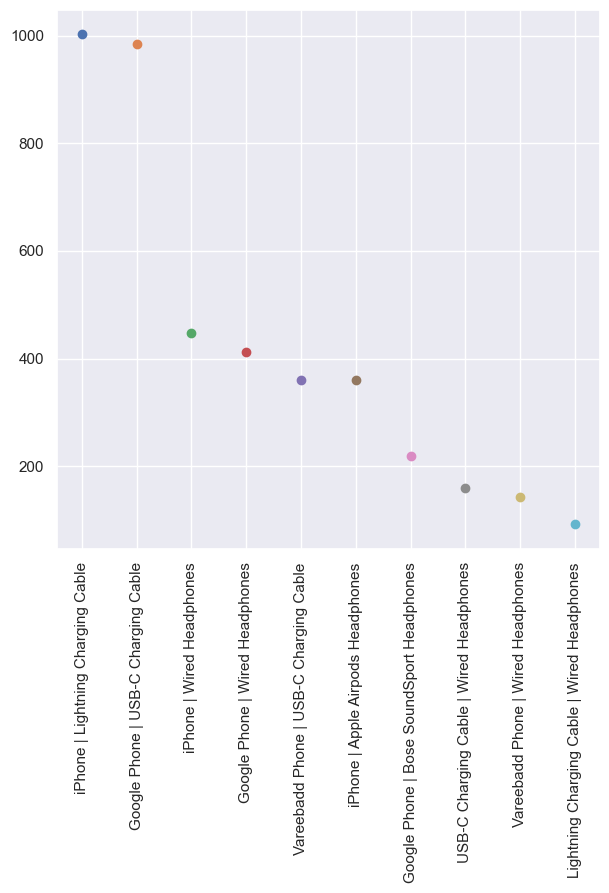

In [36]:
# plotting
plt.figure(figsize=(7,7))

for key,value in count.most_common(10):
    plt.xticks(rotation = 'vertical')
    plt.grid(visible =True,which = 'both')
    plt.scatter(x = str(key[0] + ' | ' + key[1]),y = value)    


### Q5 Which Product Sold the most

In [37]:
dpr = d2[['Product','Quantity Ordered']].groupby(by = 'Product').sum()
dpr

,Quantity Ordered
Product,
20in Monitor,4126
27in 4K Gaming Monitor,6239
27in FHD Monitor,7541
34in Ultrawide Monitor,6192
AA Batteries (4-pack),27615
AAA Batteries (4-pack),30986
Apple Airpods Headphones,15637
Bose SoundSport Headphones,13430
Flatscreen TV,4813


<BarContainer object of 19 artists>

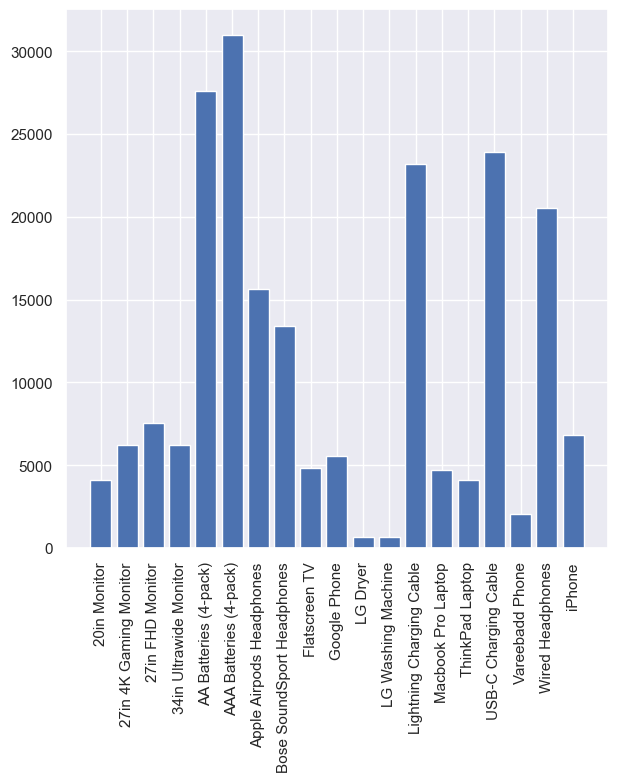

In [38]:
# plotting

plt.figure(figsize=(7,7))
plt.xticks(rotation = 'vertical')
plt.grid(visible =True,which = 'both')
plt.bar(x = dpr.index,height=dpr['Quantity Ordered'])

### Q6 Which Product Brought the most Money

In [39]:
d2.head()

,Order ID,Order Date,Product,Quantity Ordered,Price Each,Sales,Month,Purchase Address,City,Hour
0,176558,2019-04-19 08:46:00,USB-C Charging Cable,2,11.950000,23.900000,4,"917 1st St, Dallas, TX 75001",Dallas,8
1,176559,2019-04-07 22:30:00,Bose SoundSport Headphones,1,99.989998,99.989998,4,"682 Chestnut St, Boston, MA 02215",Boston,22
2,176560,2019-04-12 14:38:00,Google Phone,1,600.000000,600.000000,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,14
3,176560,2019-04-12 14:38:00,Wired Headphones,1,11.990000,11.990000,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,14
4,176561,2019-04-30 09:27:00,Wired Headphones,1,11.990000,11.990000,4,"333 8th St, Los Angeles, CA 90001",Los Angeles,9


In [40]:
dmon = d2[['Product','Sales','Quantity Ordered']].groupby('Product').sum()
dmon

,Sales,Quantity Ordered
Product,,
20in Monitor,4.538187e+05,4126
27in 4K Gaming Monitor,2.433148e+06,6239
27in FHD Monitor,1.131075e+06,7541
34in Ultrawide Monitor,2.352898e+06,6192
AA Batteries (4-pack),1.060416e+05,27615
AAA Batteries (4-pack),9.264814e+04,30986
Apple Airpods Headphones,2.345550e+06,15637
Bose SoundSport Headphones,1.342866e+06,13430
Flatscreen TV,1.443900e+06,4813


C:\Users\gamin\AppData\Local\Temp\ipykernel_15376\3863813624.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(dmon.index,rotation = 'vertical',size=10)
C:\Users\gamin\AppData\Local\Temp\ipykernel_15376\3863813624.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


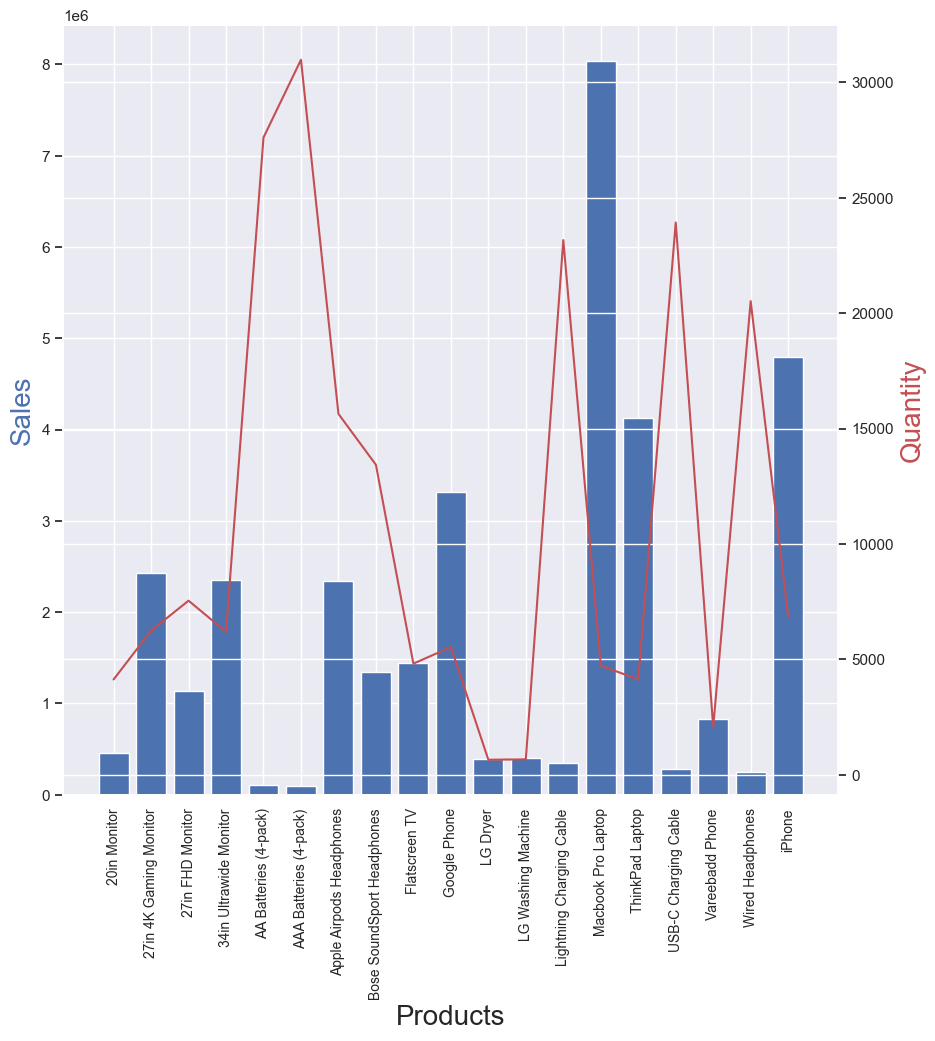

In [41]:
# plotting
fig, ax1 = plt.subplots()

# change the height
fig.set_figheight(10)
fig.set_figwidth(10)

ax2 = ax1.twinx()
ax1.bar(x =dmon.index,height = dmon['Sales'],color = 'b')
ax2.plot(dmon.index,dmon['Quantity Ordered'],color = 'r')

ax1.set_xlabel('Products',fontsize =20)
ax1.set_ylabel('Sales', color='b',fontsize =20)
ax2.set_ylabel('Quantity', color='r',fontsize =20)

ax1.set_xticklabels(dmon.index,rotation = 'vertical',size=10)

#plt.bar(x =dmon.index,height = dmon['Sales'])
fig.show()

In [42]:
# Most bought Scatter plot

dmon2 = d2[['Product','Sales','City']]
dmon2['City'] = dmon2['City'].astype('category')
dmon2


C:\Users\gamin\AppData\Local\Temp\ipykernel_15376\1833799112.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dmon2['City'] = dmon2['City'].astype('category')


,Product,Sales,City
0,USB-C Charging Cable,23.900000,Dallas
1,Bose SoundSport Headphones,99.989998,Boston
2,Google Phone,600.000000,Los Angeles
3,Wired Headphones,11.990000,Los Angeles
4,Wired Headphones,11.990000,Los Angeles
...,...,...,...
185681,AAA Batteries (4-pack),8.970000,Los Angeles
185682,iPhone,700.000000,San Francisco
185683,iPhone,700.000000,San Francisco
185684,34in Ultrawide Monitor,379.989990,San Francisco


<Axes: xlabel='Product', ylabel='Sales'>

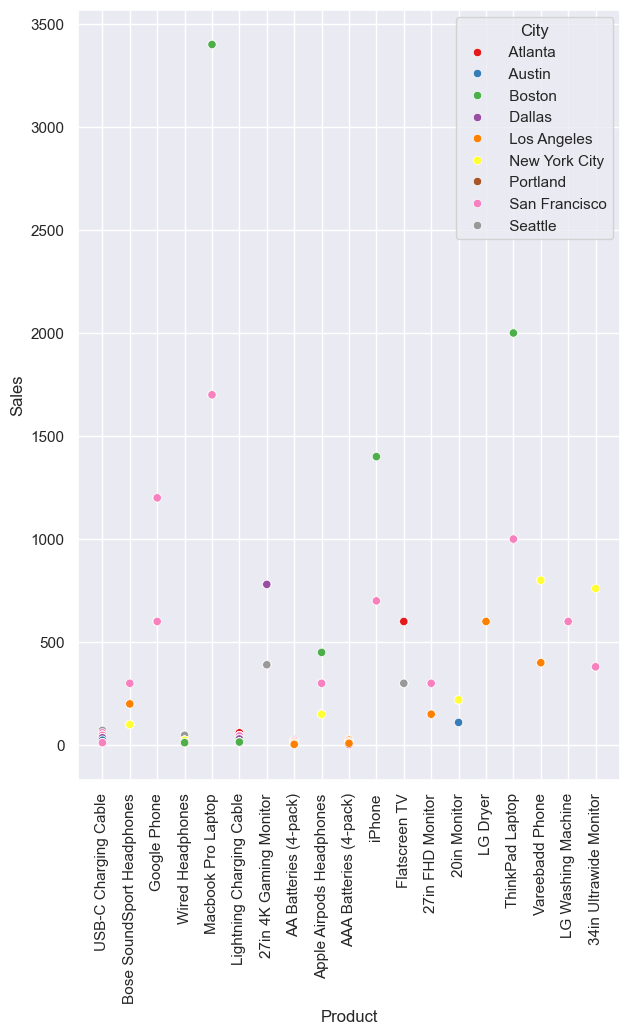

In [43]:
# plotting

plt.figure(figsize=(7,10))
# Set the scientific Notation oFf
plt.ticklabel_format(style='plain', axis='both')

plt.xticks(rotation = 'vertical')
plt.grid(visible =True,which = 'both')
sns.scatterplot(data =dmon2,x = 'Product', y = 'Sales',hue ='City',palette='Set1')

# Task 4 Geoplotting

In [44]:
import json
import plotly.express as px

In [45]:
# city state map
city_state_map = {
    'Dallas': 'Texas',
    'Boston': 'Massachusetts',
    'Los Angeles': 'California',
    'San Francisco': 'California',
    'Seattle': 'Washington',
    'Atlanta': 'Georgia',
    'New York City': 'New York',
    'Portland': 'Oregon',
    'Austin': 'Texas'
}

In [46]:
d2['State'] = d2['City'].apply(lambda city : city_state_map[city.strip()])

In [47]:
d2.head()

,Order ID,Order Date,Product,Quantity Ordered,Price Each,Sales,Month,Purchase Address,City,Hour,State
0,176558,2019-04-19 08:46:00,USB-C Charging Cable,2,11.950000,23.900000,4,"917 1st St, Dallas, TX 75001",Dallas,8,Texas
1,176559,2019-04-07 22:30:00,Bose SoundSport Headphones,1,99.989998,99.989998,4,"682 Chestnut St, Boston, MA 02215",Boston,22,Massachusetts
2,176560,2019-04-12 14:38:00,Google Phone,1,600.000000,600.000000,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,14,California
3,176560,2019-04-12 14:38:00,Wired Headphones,1,11.990000,11.990000,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,14,California
4,176561,2019-04-30 09:27:00,Wired Headphones,1,11.990000,11.990000,4,"333 8th St, Los Angeles, CA 90001",Los Angeles,9,California


In [48]:
us_states = json.load(open('Us_sates.json','r'))
us_states['features'][10].keys()

dict_keys(['type', 'properties', 'geometry'])

In [49]:
state_id_map = {}
for feature in us_states['features']:
    feature['id']  = feature['properties']['STATE']
    state_id_map[feature['properties']['NAME']] = feature['id']

In [50]:
us_states['features'][0]['properties']

{'GEO_ID': '0400000US23',
 'STATE': '23',
 'NAME': 'Maine',
 'LSAD': '',
 'CENSUSAREA': 30842.923}

In [51]:
# map state to code
d2['State Code'] = d2['State'].apply(lambda state : state_id_map[state])
d2.head(2)

,Order ID,Order Date,Product,Quantity Ordered,Price Each,Sales,Month,Purchase Address,City,Hour,State,State Code
0,176558,2019-04-19 08:46:00,USB-C Charging Cable,2,11.950000,23.900000,4,"917 1st St, Dallas, TX 75001",Dallas,8,Texas,48
1,176559,2019-04-07 22:30:00,Bose SoundSport Headphones,1,99.989998,99.989998,4,"682 Chestnut St, Boston, MA 02215",Boston,22,Massachusetts,25


In [52]:
# Taking log for better vs
d2['Sales Log'] =  np.log10(d2['Sales'])
d2.head(2)

,Order ID,Order Date,Product,Quantity Ordered,Price Each,Sales,Month,Purchase Address,City,Hour,State,State Code,Sales Log
0,176558,2019-04-19 08:46:00,USB-C Charging Cable,2,11.950000,23.900000,4,"917 1st St, Dallas, TX 75001",Dallas,8,Texas,48,1.378398
1,176559,2019-04-07 22:30:00,Bose SoundSport Headphones,1,99.989998,99.989998,4,"682 Chestnut St, Boston, MA 02215",Boston,22,Massachusetts,25,1.999957


In [59]:
fig =px.choropleth(d2,locations='State Code',geojson = us_states,color='Sales Log',scope ='usa'
                  ,hover_name='State',hover_data=['Sales'])

# Customize the color scale labels to disable scientific notation
fig.update_layout(coloraxis_colorbar=dict(
     tickformat='.0f',  # Specify format for color scale labels (no decimal places)
     title='Sales'
 ))

# focus on location
fig.update_geos(fitbounds = 'locations',visible = True)

fig.show()

In [54]:
fig2 =px.choropleth_mapbox(d2,locations='State Code',geojson = us_states,color='Sales Log'
                           ,hover_name='State',hover_data=['Sales'],mapbox_style="carto-positron"
                           ,center={'lat':42.184155,'lon': -71.206245},zoom=3,opacity = 0.5)

fig2.show()

# THE END